In [1]:
from keras.models import load_model
model = load_model('Finalmodel.h5')

In [2]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()
ret, frame = cap.read()
cap.release()

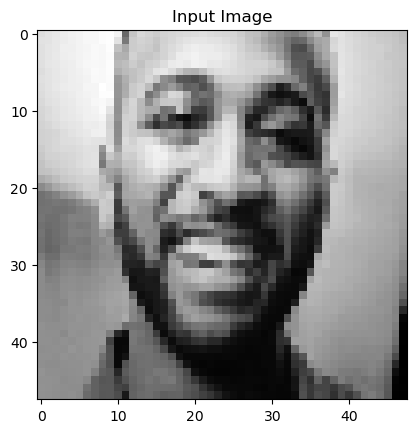

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
input_size = (48, 48)
resized_frame = cv2.resize(frame, input_size)

gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

input_image = np.reshape(gray_frame, (1, *input_size, 1))
plt.imshow(np.squeeze(input_image), cmap='gray')
plt.title('Input Image')
plt.show()

In [4]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy' ,'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

1/1 [==============================] - 0s 199ms/step
[1.3037073e-06 3.2614272e-10 1.8354981e-06 9.9968064e-01 2.8512298e-04
 2.6518316e-07 3.0848303e-05]


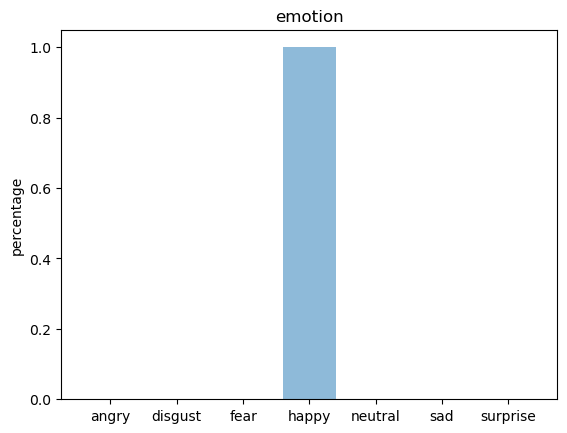

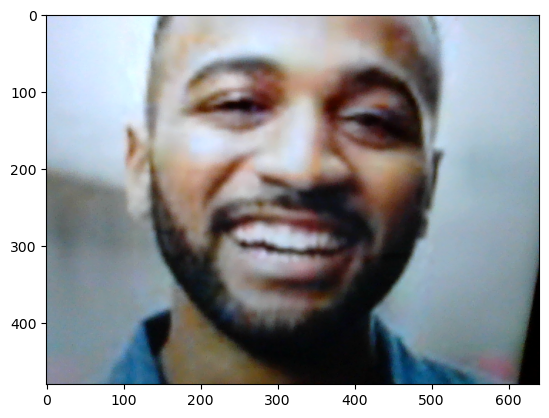

In [5]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

emotion_model = load_model(r'Finalmodel.h5')

true_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

img = cv2.resize(frame, (48, 48))

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

x = np.expand_dims(img_gray, axis=0)
x = x / 255.0 
custom = emotion_model.predict(x)

print(custom[0])
emotion_analysis(custom[0])

plt.imshow(true_image)
plt.show()
